# ♦ ELITE TECHNO GROUPS TASK 2 ♦

# 💠 EDA on Summer Olympics Dataset 💠

In [1]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 👁️‍🗨️ Reading the CSV file

In [2]:
df = pd.read_csv("Summer.csv")

# 🔍 First 5 rows in the dataset

In [3]:
df.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


# ➡ Shape of the dataset

In [4]:
df.shape
# 31165 rows and 9 columns

(31165, 9)

# ❗ Information about dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31165 entries, 0 to 31164
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        31165 non-null  int64 
 1   City        31165 non-null  object
 2   Sport       31165 non-null  object
 3   Discipline  31165 non-null  object
 4   Athlete     31165 non-null  object
 5   Country     31161 non-null  object
 6   Gender      31165 non-null  object
 7   Event       31165 non-null  object
 8   Medal       31165 non-null  object
dtypes: int64(1), object(8)
memory usage: 2.1+ MB


# ⚫ Checking for null values in dataset

In [6]:
df.isnull().sum()

Year          0
City          0
Sport         0
Discipline    0
Athlete       0
Country       4
Gender        0
Event         0
Medal         0
dtype: int64

In [7]:
# looking for the rows having NaN values
is_NaN = df.isnull()
row_has_NaN = is_NaN.any(axis = 1)
rows_with_NaN = df[row_has_NaN]

print(rows_with_NaN)

       Year    City          Sport           Discipline          Athlete  \
29603  2012  London      Athletics            Athletics          Pending   
31072  2012  London  Weightlifting        Weightlifting          Pending   
31091  2012  London  Weightlifting        Weightlifting          Pending   
31110  2012  London      Wrestling  Wrestling Freestyle  KUDUKHOV, Besik   

      Country Gender     Event   Medal  
29603     NaN  Women     1500M    Gold  
31072     NaN  Women      63KG    Gold  
31091     NaN    Men      94KG  Silver  
31110     NaN    Men  Wf 60 KG  Silver  


## ⚠ Row No. 29603, 31072, 31091 and 31110 are having NaN values in 'Country' column
## ➡ Total 4 NaN values

# ➤ Lets fill the null values using bfill() method

In [8]:
# # using backfill method to replace the NaN values
df['Country'].fillna(method ='bfill', inplace = True)

## ℹ Now there are No NaN values

In [9]:
df.isnull().sum()

Year          0
City          0
Sport         0
Discipline    0
Athlete       0
Country       0
Gender        0
Event         0
Medal         0
dtype: int64

In [10]:
# the 4 rows having NaN values
rows=[29603,31072,31091,31110]

#To display in a DataFrame format
display(df.loc[rows])

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
29603,2012,London,Athletics,Athletics,Pending,TUR,Women,1500M,Gold
31072,2012,London,Weightlifting,Weightlifting,Pending,RUS,Women,63KG,Gold
31091,2012,London,Weightlifting,Weightlifting,Pending,KOR,Men,94KG,Silver
31110,2012,London,Wrestling,Wrestling Freestyle,"KUDUKHOV, Besik",IND,Men,Wf 60 KG,Silver


## ➤ Here we can see that the NaN values have been removed by filling it successfully!!!

# ✔ VISUALIZATION AND ANALYSIS ON THE DATASET

# 📌 1. In how many cities Summer Olympics is held so far?

In [11]:
c = len(df['City'].unique())
print("=========================================================")
print(f"Summer Olympics has been held in '{c}' cities so far.")
print("=========================================================")

Summer Olympics has been held in '22' cities so far.


In [12]:
c = df.groupby(["City"]).size().reset_index(name='Number of Olympics')
c = c.sort_values(by=['Number of Olympics'], ascending = False)
c

,City,Number of Olympics
8,London,3567
2,Athens,2149
9,Los Angeles,2074
5,Beijing,2042
20,Sydney,2015
3,Atlanta,1859
4,Barcelona,1705
17,Seoul,1546
15,Paris,1396
13,Moscow,1387


In [13]:
first_column = c.iloc[:, 0]     # City column
sec_column = c.iloc[:,1]      # No. of times conducted column
print(type(first_column))
print(type(sec_column))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


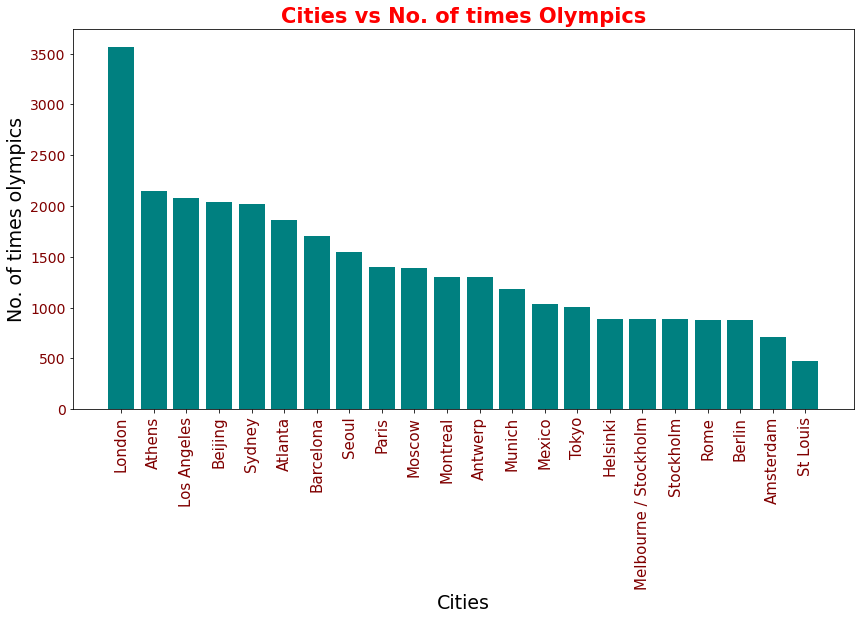

In [14]:
plt.figure(figsize = (14, 7))
 
# creating the horizontal bar plot
plt.bar(first_column, sec_column, color = 'teal')

plt.xticks(fontsize = 15, color = 'maroon', rotation=90)
plt.xlabel("Cities",fontsize = 19)

plt.yticks(fontsize = 14, color = 'maroon')
plt.ylabel("No. of times olympics",fontsize = 19)

plt.title("Cities vs No. of times Olympics", fontsize = 21, color = 'red', fontweight='bold')
plt.show()

# 📌 2. Which sport is having most number of Gold Medals so far? (Top 5)

In [15]:
s = len(df['Sport'].unique())
print("=======================================")
print(f"Total no. of unique sports: {s}.")
print("=======================================")

Total no. of unique sports: 43.


# Top 5 Sports with highest GOLD MEDALS

In [16]:
# storing the gold medals into a variable
gold = df[df['Medal']=="Gold"].groupby('Sport').count()[['Medal']].reset_index()

# then calling the gold dataframe
gold = gold.sort_values(by=['Medal'],ascending = False)
gold = gold.head()
gold

,Sport,Medal
0,Aquatics,1421
2,Athletics,1215
28,Rowing,890
17,Gymnastics,820
14,Fencing,552


In [17]:
sp = gold.iloc[:, 0]     # Sports column
medal = gold.iloc[:,1]      # Gold medals column
print(type(sp))
print(type(medal))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


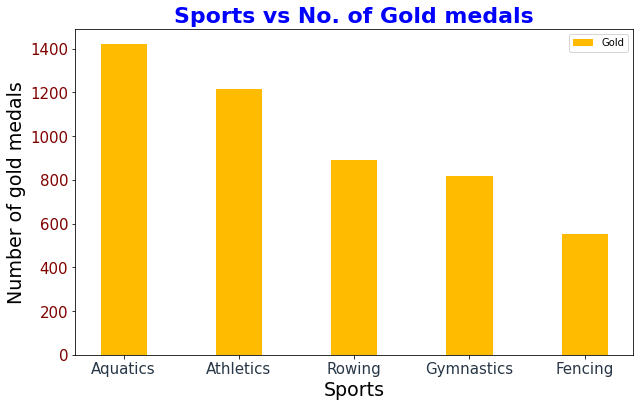

In [18]:
# plotting the graph and applyling colors to the x and y axis labels and values
plt.figure(figsize = (10, 6))
 
# creating the bar plot
plt.bar(sp, medal, color = '#ffbb00',align='center',width=0.4)

plt.xticks(fontsize = 15, color = '#283747')
plt.xlabel("Sports",fontsize = 19)

plt.yticks(fontsize = 15, color = 'maroon')
plt.ylabel("Number of gold medals",fontsize = 19)

plt.title("Sports vs No. of Gold medals", fontsize = 22, color = 'blue', fontweight = 'bold')
plt.legend(df['Medal'])
plt.show()

# 📌 3. Which sport is having most number of medals so far? (Top 5) 🏅

In [19]:
# Total number of medals won by each country
medal_counts = df['Medal'].value_counts()

medal_counts = medal_counts.sort_values(ascending = False)

# Print countries ranked by medals
print("=====================\nMedal  | No. of medals\n=====================")
print(medal_counts)

Medal  | No. of medals
Gold      10486
Bronze    10369
Silver    10310
Name: Medal, dtype: int64


In [20]:
m = df.groupby('Sport').count()['Medal']
most = m.sort_values(ascending = False).reset_index(name='Total Number of Medals')
most.head()

,Sport,Total Number of Medals
0,Aquatics,4170
1,Athletics,3638
2,Rowing,2667
3,Gymnastics,2307
4,Fencing,1613


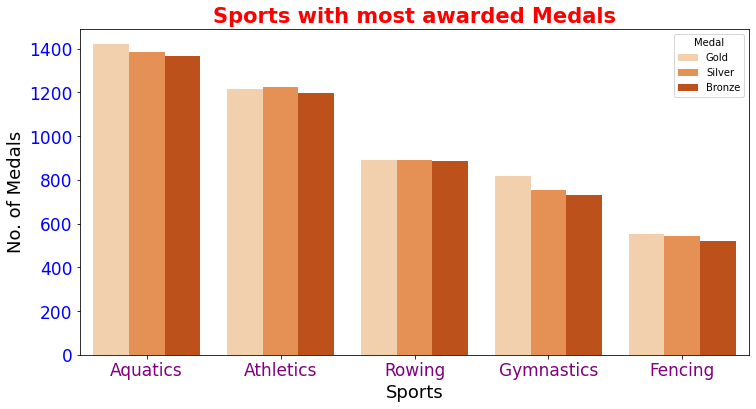

In [21]:
# plotting the graph and applyling colors to the x and y axis labels and values
plt.figure(figsize=(12, 6))

highest_sport = df['Sport'].value_counts().head().index

sns.countplot(data = df, x = 'Sport', hue = 'Medal', order=highest_sport, palette=sns.color_palette("Oranges", 3))

plt.title('Sports with most awarded Medals',fontsize = 21, fontweight='bold',color='red')

plt.xlabel('Sports', fontsize = 18)
plt.xticks(fontsize = 17, color = 'purple')

plt.ylabel('No. of Medals', fontsize = 18)
plt.yticks(fontsize = 17, color = 'blue')

plt.show()

# 📌 4. Which player has won most number of medals? (Top 5) 🏅

In [22]:
df.groupby('Athlete').count()['Medal'].sort_values(ascending=False).head().reset_index(name="Most No. Of Medals")

,Athlete,Most No. Of Medals
0,"PHELPS, Michael",22
1,"LATYNINA, Larisa",18
2,"ANDRIANOV, Nikolay",15
3,"MANGIAROTTI, Edoardo",13
4,"ONO, Takashi",13


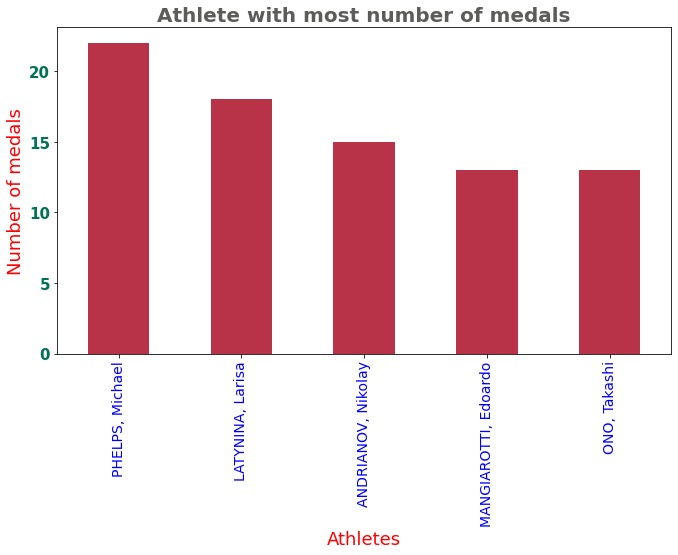

In [23]:
df.groupby('Athlete').count()['Medal'].sort_values(ascending=False).head().plot.bar(figsize=(11, 6),color='#b83347')

# plotting the graph and applyling colors to the x and y axis labels and values
plt.title('Athlete with most number of medals', color='#5c5c5b', fontsize=20, fontweight = 'bold')

plt.xticks(color='blue', fontsize=14)
plt.xlabel("Athletes",fontsize=18, color='red')

plt.yticks(color='#007256', fontsize=15, fontweight='bold')
plt.ylabel("Number of medals", fontsize=18, color='red')

plt.show()

# 📌 5. Which player has won most number Gold Medals of medals? 🥇 (Top 5)

In [24]:
df[df['Medal']=='Gold'].groupby("Athlete")['Medal'].count().sort_values(ascending=False).head(5).reset_index(name="Most No. of Gold Medals")

,Athlete,Most No. of Gold Medals
0,"PHELPS, Michael",18
1,"LEWIS, Carl",9
2,"NURMI, Paavo",9
3,"SPITZ, Mark",9
4,"LATYNINA, Larisa",9


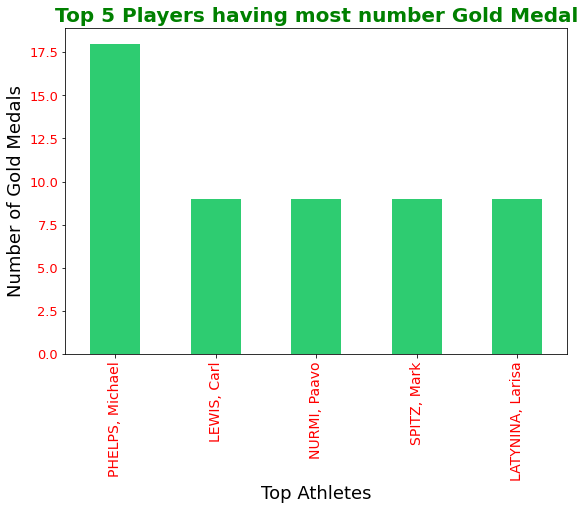

In [25]:
top5_athlete = df[df['Medal']=='Gold'].groupby("Athlete")['Medal'].count().sort_values(ascending=False).head(5)

# plotting the graph and applyling colors to the x and y axis labels and values
top5_athlete.plot.bar(figsize = (9,6),color = '#2ECC71')

plt.xticks(fontsize = 14, color = 'red')
plt.xlabel("Top Athletes",fontsize = 18)

plt.yticks(fontsize = 13, color = 'red')
plt.ylabel("Number of Gold Medals",fontsize = 18)

plt.title("Top 5 Players having most number Gold Medal", fontsize = 20, color = 'green', fontweight='bold')
plt.show()

# 📌 6. In which year India won first Gold Medal in Summer Olympics? 🥇

In [26]:
# creating a dataframe of gold medals
gold = df[df['Medal'] == 'Gold']
# calling the gold dataframe and country as India
gold = gold[gold['Country']=='IND'].head()
gold

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
5512,1928,Amsterdam,Hockey,Hockey,"ALLEN, Richard James",IND,Men,Hockey,Gold
5513,1928,Amsterdam,Hockey,Hockey,"CHAND, Dyan",IND,Men,Hockey,Gold
5514,1928,Amsterdam,Hockey,Hockey,"GATELEY, Maurice A.",IND,Men,Hockey,Gold
5515,1928,Amsterdam,Hockey,Hockey,"GILL, K. S.",IND,Men,Hockey,Gold
5516,1928,Amsterdam,Hockey,Hockey,"GOODSIR-CULLEN, William John",IND,Men,Hockey,Gold


In [27]:
ans = gold[gold['Country']=='IND']['Year'].min()
print("=======================================================")
print(f"In the year {ans} India won its First Gold Medal")
print("=======================================================")

In the year 1928 India won its First Gold Medal


# 📌 7. Which event is most popular in terms on number of players? (Top 5) 📈

In [28]:
df.groupby("Event").count()['Athlete'].sort_values(ascending=False).head(5).reset_index(name = "No. Of Players")

,Event,No. Of Players
0,Football,1497
1,Hockey,1422
2,Team Competition,1147
3,Basketball,1012
4,Handball,973


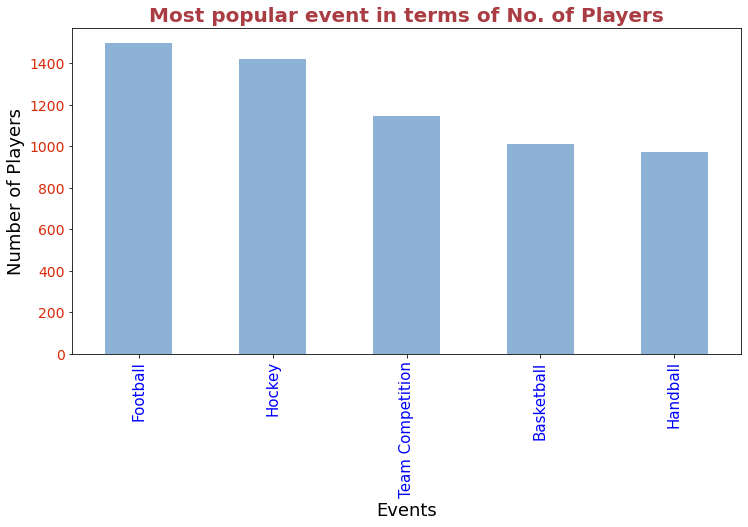

In [29]:
data = df.groupby("Event").count()['Athlete'].sort_values(ascending=False).head(5)

# plotting the graph and applyling colors to the x and y axis labels and values
data.plot.bar(figsize=(12,6), color = '#8eb1d6')

plt.xticks(fontsize = 15, color = 'blue')
plt.xlabel("Events",fontsize = 18)

plt.yticks(fontsize = 14, color = '#d82907')
plt.ylabel("Number of Players", fontsize = 18)

plt.title("Most popular event in terms of No. of Players", fontsize = 20, color = '#a93d43', fontweight='bold')
plt.show()

# 📌 8. Which sport is having most female Gold Medalists? (Top 5)

In [30]:
women = df[df['Gender'] == 'Women']
women = women[women['Medal'] == 'Gold'].head()
women

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
417,1900,Paris,Golf,Golf,"ABBOTT, Margaret Ives",USA,Women,Individual,Gold
641,1900,Paris,Tennis,Tennis,"COOPER, Charlotte",GBR,Women,Mixed Doubles,Gold
649,1900,Paris,Tennis,Tennis,"COOPER, Charlotte",GBR,Women,Singles,Gold
710,1904,St Louis,Archery,Archery,"HOWELL, Matilda Scott",USA,Women,Double Columbia Round (50Y - 40Y - 30Y),Gold
713,1904,St Louis,Archery,Archery,"HOWELL, Matilda Scott",USA,Women,Double National Round (60Y - 50Y),Gold


In [31]:
# dataframe creation where gender is women
women = df[df['Gender']=='Women']
data = []       # empty list

# using for loop and women dataframe calculating length
for sport in women['Sport'].unique():
  data.append([sport, len(women[women['Sport'] == sport])])    #appending empty list with length calculated

data = pd.DataFrame(data, columns=['Sport', 'No. of Female Gold Medalists']).sort_values(by='No. of Female Gold Medalists', ascending=False).head()
data

,Sport,No. of Female Gold Medalists
4,Aquatics,1726
8,Athletics,1163
9,Gymnastics,799
14,Rowing,651
11,Volleyball,497


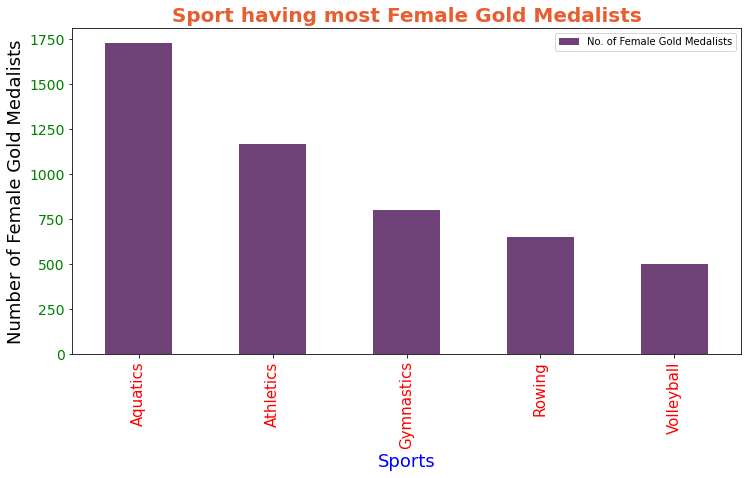

In [32]:
data = pd.DataFrame(data, columns = ['Sport','No. of Female Gold Medalists']).sort_values(by='No. of Female Gold Medalists', ascending=False).head()

# plotting the graph and applyling colors to the x and y axis labels and values
data.plot.bar(x = 'Sport' , y = 'No. of Female Gold Medalists',figsize=(12,6), color = '#6e4177')

plt.xticks(fontsize = 15, color = 'red')
plt.xlabel("Sports",fontsize = 18, color = 'blue')

plt.yticks(fontsize = 14, color = 'green')
plt.ylabel("Number of Female Gold Medalists", fontsize = 18)

plt.title("Sport having most Female Gold Medalists", fontsize = 20, color = '#e85e31', fontweight='bold')
plt.show()

# 📍 Conclusion:

### 1. In how many cities Summer Olympics is held so far?
#### Ans. Summer Olympics has been held in '22' cities so far.

### 2. Which sport is having most number of Gold Medals so far? (Top 5)
#### Ans. Aquatics, Athletics, Rowing, Gymnastics and Fencing are Top 5 sports having Gold medals.

### 3. Which sport is having most number of medals so far? (Top 5)
#### Ans. Aquatics, Athletics, Rowing, Gymnastics and Fencing are Top 5 sports having most medals.

### 4. Which player has won most number of medals? (Top 5)
#### Ans. PHELPS Michael 22, LATYNINA Larisa 18, ANDRIANOV Nikolay 15, MANGIAROTTI Edoardo 13, ONO Takashi 13 are the players who have won most medals.

### 5. Which player has won most number Gold Medals of medals? (Top 5)
#### Ans. PHELPS Michael 18, LEWIS Carl 9, NURMI Paavo 9, SPITZ Mark 9, LATYNINA Larisa 9 are the top 5 players having most gold medals.

### 6. In which year India won first Gold Medal in Summer Olympics?
#### Ans. In the year 1928 India won its First Gold Medal.

### 7. Which event is most popular in terms on number of players? (Top 5)
#### Ans. Football 1497, Hockey 1422, Team Competition 1147, Basketball 1012, Handball 973 are the popular event in terms of No. of players.

### 8. Which sport is having most female Gold Medalists? (Top 5)
#### Ans. Aquatics 1726, Athletics 1163, Gymnastics 799, Rowing 651, Volleyball 497 are the sports having most female Gold Medalists.